In [223]:
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [224]:
# ett slipp gjort på 8min og ett slipp gjort på ca 17min.
input_file: str = "datalog.csv"
drop_num: int = 0

drops: list[tuple[int, ...]] = [
    (500000, 520000),
    (1010000, 1030000)
]

with open(input_file, "r") as file:
    lines = file.readlines()

# Identify indices where headers repeat
header: str = "Timestamp,ExtPressure (kPa),IntPressure (kPa),Temp (C),AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ"
split_indices: list[int] = [i for i, line in enumerate(lines) if line.strip() == header]
split_indices.append(len(lines))  

print(f"Indeces: {split_indices[:-1]}")

data: list[tuple[float, ...]] = []
time_offset: int = 0
for i in range(len(split_indices) - 1):
    start: int = split_indices[i] + 1 
    end: int = split_indices[i + 1]

    # Assuming 0 ms in restart    
    part: list[str] = lines[start:end]
    if i > 0:
        time_offset += int(lines[start - 2].split(",")[0])
    
    for sample in part:
        res = []
        for idx, val in enumerate(sample.strip().split(",")):
            val = float(val)
            if idx == 0: 
                # timestamp 
                val += time_offset
            res.append(val)
        data.append(tuple(res))

    
df = pd.DataFrame(data, columns=header.split(","))    
df = df.apply(pd.to_numeric, errors="ignore")
df

Indeces: [0, 5116, 10285, 10303]


,Timestamp,ExtPressure (kPa),IntPressure (kPa),Temp (C),AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,956.0,125.26,102.37,10.99,0.312,0.596,-0.734,-8.057,2.625,-2.136
1,1035.0,126.45,102.37,11.03,0.369,0.593,-0.724,0.305,3.784,3.296
2,1114.0,124.30,102.37,11.09,0.330,0.609,-0.725,7.996,2.136,5.432
3,1194.0,126.45,102.37,11.11,0.347,0.629,-0.693,-5.859,-2.930,-0.854
4,1273.0,126.45,102.37,11.13,0.356,0.588,-0.755,6.958,10.559,9.766
...,...,...,...,...,...,...,...,...,...,...
13012,1333425.0,125.26,102.33,9.16,0.177,0.790,-0.326,18.799,-14.160,1.648
13013,1333529.0,125.50,102.33,9.16,0.185,0.977,-0.662,5.188,-3.540,7.019
13014,1333632.0,126.21,102.33,9.16,0.353,0.821,-0.386,0.671,-0.977,1.587
13015,1333735.0,125.26,102.33,9.16,0.263,0.798,-0.452,3.723,-5.005,-0.061


In [225]:
all_timestamps = df["Timestamp"]
all_ext_pressures = df["ExtPressure (kPa)"]
all_int_pressures = df["IntPressure (kPa)"]
all_temperatures = df["Temp (C)"]
all_accelerations = df[["AccelX", "AccelY", "AccelZ"]]
all_gyros = df[["GyroX", "GyroY", "GyroZ"]]

all_accelerations_x = all_accelerations["AccelX"]
all_accelerations_y = all_accelerations["AccelY"]
all_accelerations_z = all_accelerations["AccelZ"]

all_gyros_x = all_gyros["GyroX"]
all_gyros_y = all_gyros["GyroY"]
all_gyros_z = all_gyros["GyroZ"]


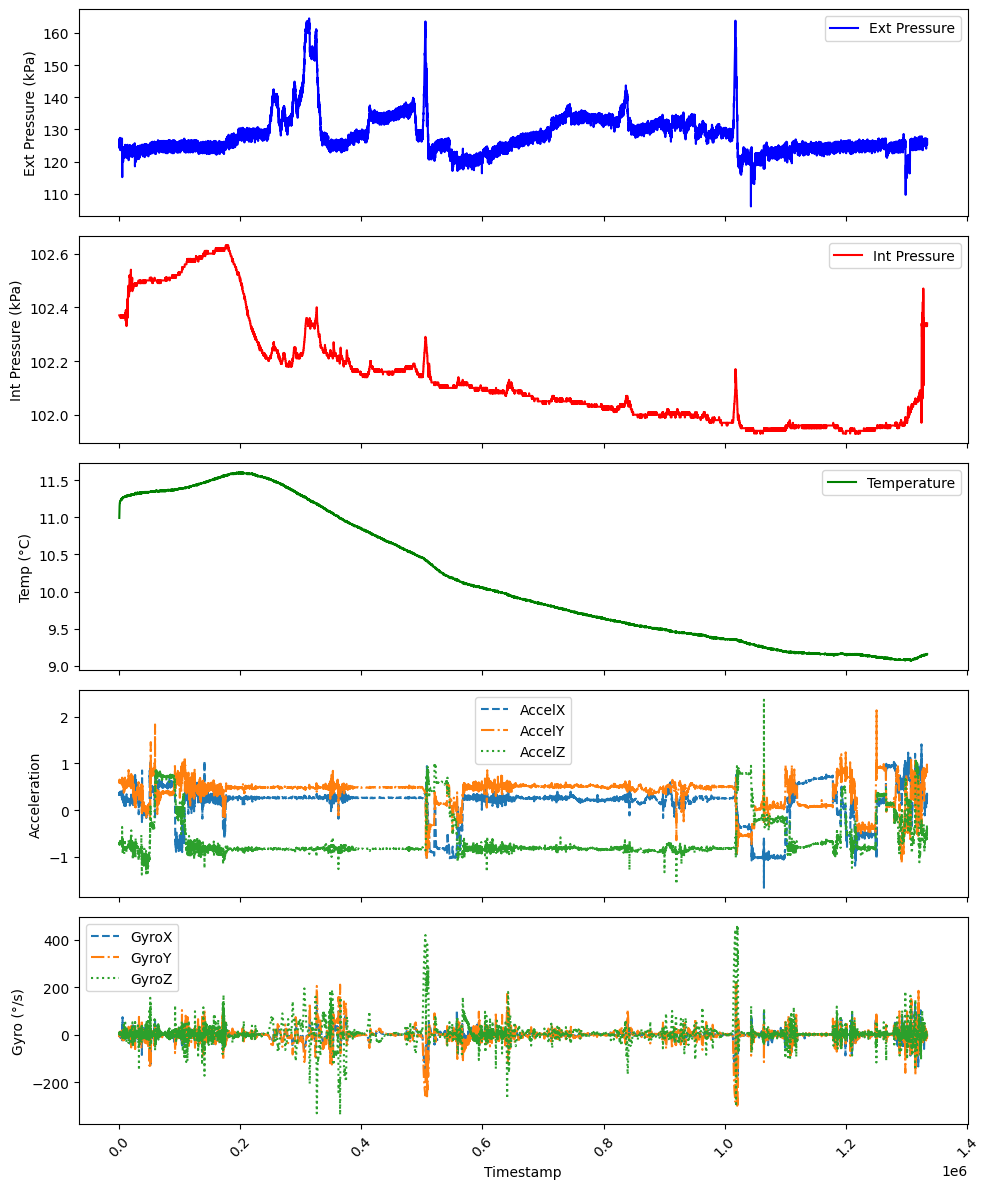

In [226]:
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Plot ExtPressure
axes[0].plot(all_timestamps, all_ext_pressures, label="Ext Pressure", color="blue")
axes[0].set_ylabel("Ext Pressure (kPa)")
axes[0].legend()

# Plot IntPressure
axes[1].plot(all_timestamps, all_int_pressures, label="Int Pressure", color="red")
axes[1].set_ylabel("Int Pressure (kPa)")
axes[1].legend()

# Plot Temperature
axes[2].plot(all_timestamps, all_temperatures, label="Temperature", color="green")
axes[2].set_ylabel("Temp (°C)")
axes[2].legend()

# Plot Accelerations
axes[3].plot(all_timestamps, all_accelerations_x, label="AccelX", linestyle="--")
axes[3].plot(all_timestamps, all_accelerations_y, label="AccelY", linestyle="-.")
axes[3].plot(all_timestamps, all_accelerations_z, label="AccelZ", linestyle=":")
axes[3].set_ylabel("Acceleration")
axes[3].legend()

# Plot Gyroscope data
axes[4].plot(all_timestamps, all_gyros_x, label="GyroX", linestyle="--")
axes[4].plot(all_timestamps, all_gyros_y, label="GyroY", linestyle="-.")
axes[4].plot(all_timestamps, all_gyros_z, label="GyroZ", linestyle=":")
axes[4].set_ylabel("Gyro (°/s)")
axes[4].legend()

# Format x-axis
axes[4].set_xlabel("Timestamp")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
drop = drops[drop_num]
start_time, end_time = drop
print(start_time, end_time)

drop_df = df.loc[((df["Timestamp"] >= start_time) & (df["Timestamp"] <= end_time))]

drop_timestamps = drop_df["Timestamp"].to_numpy()
drop_ext_pressures = drop_df["ExtPressure (kPa)"].to_numpy()
drop_int_pressures = drop_df["IntPressure (kPa)"].to_numpy()
drop_temperatures = drop_df["Temp (C)"].to_numpy()
drop_accelerations_df = drop_df[["AccelX", "AccelY", "AccelZ"]]
drop_gyros_df = drop_df[["GyroX", "GyroY", "GyroZ"]]

# NOTE order: Assumed z in y
drop_accelerations_y = drop_accelerations_df["AccelX"].to_numpy()
drop_accelerations_z = drop_accelerations_df["AccelY"].to_numpy()
drop_accelerations_x = -drop_accelerations_df["AccelZ"].to_numpy()

drop_gyros_y = drop_gyros_df["GyroX"].to_numpy()
drop_gyros_z = drop_gyros_df["GyroY"].to_numpy()
drop_gyros_x = -drop_gyros_df["GyroZ"].to_numpy()

drop_df



500000 520000


,Timestamp,ExtPressure (kPa),IntPressure (kPa),Temp (C),AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
5057,500079.0,129.32,102.14,10.46,0.261,0.494,-0.833,-5.005,-8.240,19.287
5058,500181.0,128.37,102.15,10.46,0.260,0.495,-0.835,-4.578,-7.629,18.188
5059,500284.0,129.56,102.14,10.46,0.258,0.495,-0.837,-3.845,-6.775,16.296
5060,500399.0,127.41,102.14,10.46,0.257,0.495,-0.835,-2.991,-6.104,14.404
5061,500502.0,127.89,102.14,10.46,0.257,0.496,-0.832,-2.563,-5.676,13.245
...,...,...,...,...,...,...,...,...,...,...
5235,519488.0,121.19,102.12,10.33,-0.891,-0.364,0.382,7.751,3.174,-1.648
5236,519590.0,124.30,102.12,10.33,-0.895,-0.364,0.377,8.057,2.747,-2.319
5237,519705.0,125.26,102.12,10.33,-0.901,-0.360,0.374,8.057,4.395,-2.930
5238,519808.0,121.67,102.12,10.33,-0.902,-0.360,0.377,7.751,6.531,-3.723


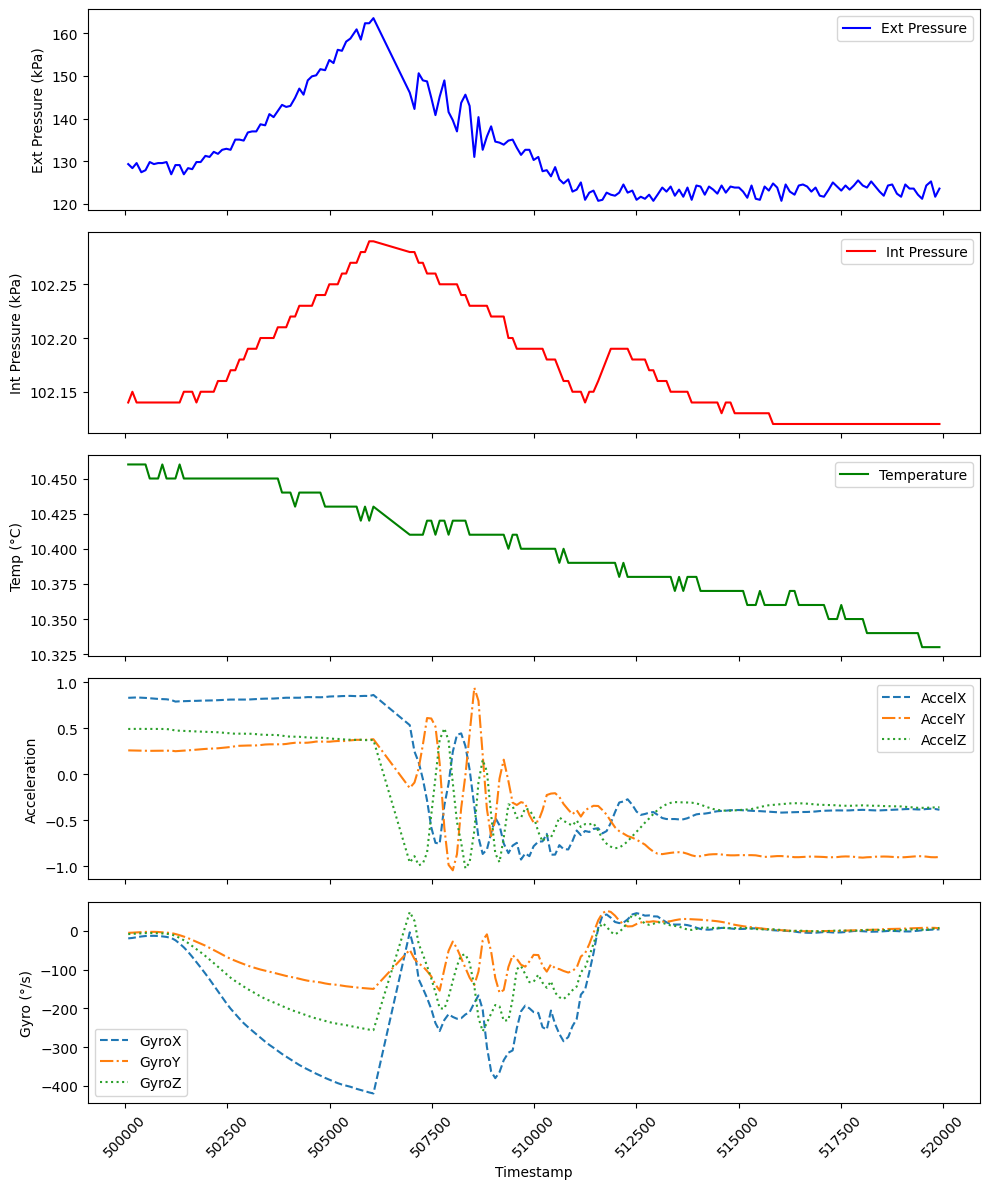

In [228]:
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Plot ExtPressure
axes[0].plot(drop_timestamps, drop_ext_pressures, label="Ext Pressure", color="blue")
axes[0].set_ylabel("Ext Pressure (kPa)")
axes[0].legend()

# Plot IntPressure
axes[1].plot(drop_timestamps, drop_int_pressures, label="Int Pressure", color="red")
axes[1].set_ylabel("Int Pressure (kPa)")
axes[1].legend()

# Plot Temperature
axes[2].plot(drop_timestamps, drop_temperatures, label="Temperature", color="green")
axes[2].set_ylabel("Temp (°C)")
axes[2].legend()

# Plot Accelerations
axes[3].plot(drop_timestamps, drop_accelerations_x, label="AccelX", linestyle="--")
axes[3].plot(drop_timestamps, drop_accelerations_y, label="AccelY", linestyle="-.")
axes[3].plot(drop_timestamps, drop_accelerations_z, label="AccelZ", linestyle=":")
axes[3].set_ylabel("Acceleration")
axes[3].legend()

# Plot Gyroscope data
axes[4].plot(drop_timestamps, drop_gyros_x, label="GyroX", linestyle="--")
axes[4].plot(drop_timestamps, drop_gyros_y, label="GyroY", linestyle="-.")
axes[4].plot(drop_timestamps, drop_gyros_z, label="GyroZ", linestyle=":")
axes[4].set_ylabel("Gyro (°/s)")
axes[4].legend()

# Format x-axis
axes[4].set_xlabel("Timestamp")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [229]:
# Assumption: t0 => p0 = 0, v0 = 0
# Assumption: max depth = 5m

# Units: acc -> m^2/s, gyro -> dps
from scipy.spatial.transform import Rotation as rot

min_pressure: float = drop_ext_pressures.min()
max_pressure: float = drop_ext_pressures.max()

# pseudo-correction data 
max_depth: float = 5
b = min_pressure
a = max_depth / (max_pressure - b)
def depth(external_pressure: float) -> float:
    return a * (external_pressure - b)

N = len(drop_timestamps)
positions_imu: np.ndarray = np.zeros((N, 3))
velocities_imu: np.ndarray = np.zeros((N, 3))
attitudes: np.ndarray = np.zeros((N, 3))

pos_imu: np.ndarray = np.zeros((3,1))
vel_imu: np.ndarray = np.zeros((3,1))
rpy: np.ndarray = np.zeros((3,1)) # Assuming gimbal lock not a problem

def T(rpy: np.ndarray) -> np.ndarray:
    phi_rad = np.deg2rad(rpy[0,0])
    theta_rad = np.deg2rad(rpy[1,0])

    c_phi = np.cos(phi_rad)
    s_phi = np.sin(phi_rad)

    c_theta = np.cos(theta_rad)
    s_theta = np.sin(theta_rad)

    t_theta = s_theta / c_theta

    return np.array(
        [
            [1, s_phi * t_theta, c_phi * t_theta], 
            [0, c_theta, -s_phi],
            [0, s_phi / c_theta, c_phi / c_theta]
        ]
    )
    

def R(rpy: np.ndarray) -> np.ndarray:
    R = rot.from_euler(seq="xyz", angles=rpy.reshape((3,)), degrees=True)
    return R.as_matrix()

def J(rpy: np.ndarray) -> np.ndarray:
    return np.block([
        [R(rpy), np.zeros((3,3))],
        [np.zeros((3,3)), T(rpy)]
    ])

imu_freq = 104
h_imu = 1.0 / imu_freq

# No thought into these rn
I = np.ones((3,1))
K1 = np.zeros((3,1))
K1[2,0] = 0.1
K2 = np.zeros((3,1))
K2[2,0] = 0.001
K3 = np.zeros((3,1))
K3[2,0] = 0.001

K = np.block([
    [K1], [K2], [K3]
])

t_prev = drop_timestamps[0]
for i, t in enumerate(drop_timestamps):
    # Assuming timestamps in ms
    # dt_ms = t - t_prev
    # dt = dt_ms / 1000
    # t_prev = t
    dt = h_imu

    pos_dot = vel_imu 
    vel_dot = R(rpy) @ np.array(
        [
            [drop_accelerations_x[i]], 
            [drop_accelerations_y[i]], 
            [drop_accelerations_z[i]]
        ]
    )
    rpy_dot = T(rpy) @ np.array(
        [
            [drop_gyros_x[i]], 
            [drop_gyros_y[i]], 
            [drop_gyros_z[i]]
        ]
    )

    measured_depth = depth(external_pressure=drop_ext_pressures[i])
    corr = measured_depth - pos_imu[2,0]
    # print(measured_depth, pos_imu[2, 0])
    
    # Assuming ERK1 sufficient
    pos_imu = pos_imu + dt * pos_dot + K1 * corr
    # print(K1 * corr)
    vel_imu = vel_imu + dt * vel_dot + K2 * corr
    rpy = rpy + dt * rpy_dot + K3 * corr

    positions_imu[i,:] = pos_imu.reshape((3,))
    velocities_imu[i,:] = vel_imu.reshape((3,))
    attitudes[i,:] = rpy.reshape((3,))


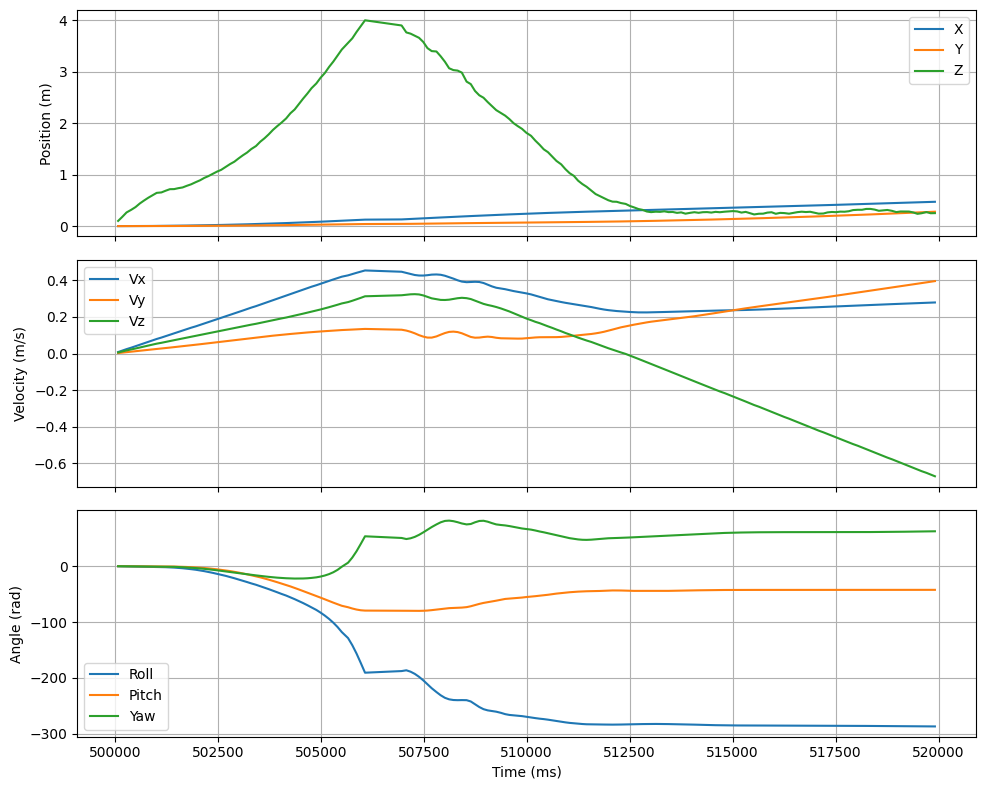

In [230]:
timestamps = drop_timestamps
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Position plot
axes[0].plot(timestamps, positions_imu[:, 0], label="X")
axes[0].plot(timestamps, positions_imu[:, 1], label="Y")
axes[0].plot(timestamps, positions_imu[:, 2], label="Z")
axes[0].set_ylabel("Position (m)")
axes[0].legend()
axes[0].grid()

# Velocity plot
axes[1].plot(timestamps, velocities_imu[:, 0], label="Vx")
axes[1].plot(timestamps, velocities_imu[:, 1], label="Vy")
axes[1].plot(timestamps, velocities_imu[:, 2], label="Vz")
axes[1].set_ylabel("Velocity (m/s)")
axes[1].legend()
axes[1].grid()

# Attitude plot (roll, pitch, yaw)
axes[2].plot(timestamps, attitudes[:, 0], label="Roll")
axes[2].plot(timestamps, attitudes[:, 1], label="Pitch")
axes[2].plot(timestamps, attitudes[:, 2], label="Yaw")
axes[2].set_ylabel("Angle (rad)")
axes[2].set_xlabel("Time (ms)")
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()

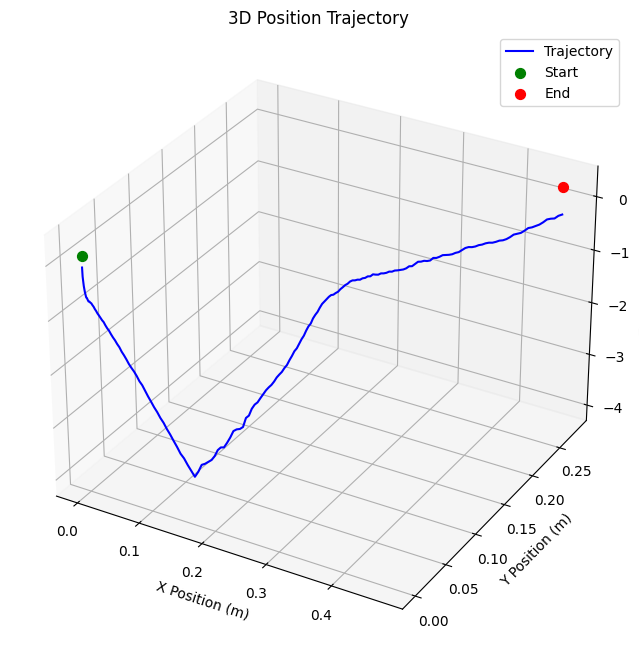

In [231]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(positions_imu[:, 0], positions_imu[:, 1], -positions_imu[:, 2], label="Trajectory", color="b")

ax.scatter(positions_imu[0, 0], positions_imu[0, 1], positions_imu[0, 2], color="g", s=50, label="Start")
ax.scatter(positions_imu[-1, 0], positions_imu[-1, 1], positions_imu[-1, 2], color="r", s=50, label="End")

# Labels and title
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")
ax.set_title("3D Position Trajectory")
ax.legend()
ax.grid()

plt.show()